# Now Building CKD model after spliting the data into training and testing part 
### (We can split the data into training, testing and validation part but the observation points is too small)

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).



### Load all the relavent libraries

In [0]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV,train_test_split
from sklearn.metrics import recall_score
from imblearn.over_sampling import SMOTE
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
#! pip install imblearn

### Load the Consolidated CKD Dataset for further processing

In [0]:
CKD = pd.read_csv("/content/consolidate_ckd.csv")

In [41]:
CKD.head()

,id,race,gender,age,creatinine_no_of_test,creatinine_mean_value,creatinine_duration_of_test,glucose_no_of_test,glucose_mean_value,glucose_duration_of_test,HGB_no_of_test,HGB_mean_value,HGB_duration_of_test,ldl_no_of_test,ldl_mean_value,ldl_duration_of_test,SBP_no_of_test,SBP_mean_value,SBP_duration_of_test,DBP_no_of_test,DBP_mean_value,DBP_duration_of_test,atenolol,atorvastatin,bisoprolol,canagliflozin,carvedilol,dapagliflozin,irbesartan,labetalol,losartan,lovastatin,metformin,metoprolol,nebivolol,olmesartan,pitavastatin,pravastatin,propranolol,rosuvastatin,simvastatin,telmisartan,valsartan,total_no_of_days_with_drug,total_no_of_days_without_drug,Stage_Progress
0,0,Unknown,Male,70,6,1.236667,2043,6,6.456667,2043,9,13.262222,5405,3,143.593333,489,8,139.610000,3169,8,83.173750,3169,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,450.0,NaN,660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1290.0,328.0,True
1,1,White,Female,71,5,1.838000,1214,5,9.240000,1602,7,13.662857,4777,5,82.424000,1602,7,150.232857,2454,7,80.455714,2454,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,221.0,False
2,2,White,Female,57,5,2.170000,1737,3,6.466667,804,8,15.700000,4500,3,75.283333,681,4,140.210000,1242,4,89.217500,1242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,180.0,487.0,True
3,3,White,Male,74,5,0.996000,1800,6,6.525000,2475,10,13.198000,7395,5,98.246000,1670,7,139.588571,2963,7,74.857143,2963,NaN,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,301.0,False
4,4,White,Female,50,6,1.150000,2120,7,9.720000,1974,5,12.658000,2990,4,65.907500,1016,7,160.667143,2445,7,97.385714,2445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,540.0,NaN,NaN,NaN,NaN,720.0,NaN,NaN,NaN,NaN,NaN,1620.0,481.0,True


In [42]:
CKD.Stage_Progress.value_counts()

False    200
True     100
Name: Stage_Progress, dtype: int64

### Here, We can see CKD Stage progress rate for success = 33.3 %
###                     Stage progress rate for failure = 66.7 %

In [44]:
CKD = CKD[[col for col in CKD.columns if col!='id']] ## removing id columns as it is unique val to identify
CKD.shape


(300, 45)

### Create Dummies for Categorical Columns : Race and Gender

In [45]:
CKD_dummies = pd.get_dummies(data=CKD, columns=['race','gender'],drop_first=True)
CKD_dummies.shape

(300, 48)

In [46]:
CKD_dummies.head()

,age,creatinine_no_of_test,creatinine_mean_value,creatinine_duration_of_test,glucose_no_of_test,glucose_mean_value,glucose_duration_of_test,HGB_no_of_test,HGB_mean_value,HGB_duration_of_test,ldl_no_of_test,ldl_mean_value,ldl_duration_of_test,SBP_no_of_test,SBP_mean_value,SBP_duration_of_test,DBP_no_of_test,DBP_mean_value,DBP_duration_of_test,atenolol,atorvastatin,bisoprolol,canagliflozin,carvedilol,dapagliflozin,irbesartan,labetalol,losartan,lovastatin,metformin,metoprolol,nebivolol,olmesartan,pitavastatin,pravastatin,propranolol,rosuvastatin,simvastatin,telmisartan,valsartan,total_no_of_days_with_drug,total_no_of_days_without_drug,Stage_Progress,race_Black,race_Hispanic,race_Unknown,race_White,gender_Male
0,70,6,1.236667,2043,6,6.456667,2043,9,13.262222,5405,3,143.593333,489,8,139.610000,3169,8,83.173750,3169,NaN,180.0,NaN,NaN,NaN,NaN,NaN,NaN,450.0,NaN,660.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1290.0,328.0,True,0,0,1,0,1
1,71,5,1.838000,1214,5,9.240000,1602,7,13.662857,4777,5,82.424000,1602,7,150.232857,2454,7,80.455714,2454,NaN,300.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,300.0,221.0,False,0,0,0,1,0
2,57,5,2.170000,1737,3,6.466667,804,8,15.700000,4500,3,75.283333,681,4,140.210000,1242,4,89.217500,1242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,180.0,NaN,NaN,NaN,180.0,487.0,True,0,0,0,1,0
3,74,5,0.996000,1800,6,6.525000,2475,10,13.198000,7395,5,98.246000,1670,7,139.588571,2963,7,74.857143,2963,NaN,360.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,301.0,False,0,0,0,1,1
4,50,6,1.150000,2120,7,9.720000,1974,5,12.658000,2990,4,65.907500,1016,7,160.667143,2445,7,97.385714,2445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,360.0,NaN,540.0,NaN,NaN,NaN,NaN,720.0,NaN,NaN,NaN,NaN,NaN,1620.0,481.0,True,0,0,0,1,0



### Now check, is there any columns with NA/ nul values

In [47]:
CKD_dummies.isnull().sum()

age                                0
creatinine_no_of_test              0
creatinine_mean_value              0
creatinine_duration_of_test        0
glucose_no_of_test                 0
glucose_mean_value                 0
glucose_duration_of_test           0
HGB_no_of_test                     0
HGB_mean_value                     0
HGB_duration_of_test               0
ldl_no_of_test                     0
ldl_mean_value                     0
ldl_duration_of_test               0
SBP_no_of_test                     0
SBP_mean_value                     0
SBP_duration_of_test               0
DBP_no_of_test                     0
DBP_mean_value                     0
DBP_duration_of_test               0
atenolol                         274
atorvastatin                     191
bisoprolol                       295
canagliflozin                    296
carvedilol                       283
dapagliflozin                    298
irbesartan                       294
labetalol                        299
l


### Replace the NA's with zero for further processing

In [0]:
CKD_dummies.fillna(0,inplace=True)


### Check once again to verify

In [49]:
CKD_dummies.isnull().sum()

age                              0
creatinine_no_of_test            0
creatinine_mean_value            0
creatinine_duration_of_test      0
glucose_no_of_test               0
glucose_mean_value               0
glucose_duration_of_test         0
HGB_no_of_test                   0
HGB_mean_value                   0
HGB_duration_of_test             0
ldl_no_of_test                   0
ldl_mean_value                   0
ldl_duration_of_test             0
SBP_no_of_test                   0
SBP_mean_value                   0
SBP_duration_of_test             0
DBP_no_of_test                   0
DBP_mean_value                   0
DBP_duration_of_test             0
atenolol                         0
atorvastatin                     0
bisoprolol                       0
canagliflozin                    0
carvedilol                       0
dapagliflozin                    0
irbesartan                       0
labetalol                        0
losartan                         0
lovastatin          






### Prepare Independent variables and target variable
######  1. Split the dataset into train and test 
######     Traing set = 90%
######     Test Set = 10%     (As we have very limited observation points)

In [50]:
x = CKD_dummies[[col for col in CKD_dummies.columns if col!='Stage_Progress']]
y = CKD_dummies['Stage_Progress']
print(x.shape)
print(y.shape)

(300, 47)
(300,)


In [52]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.10,random_state=123)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(270, 47)
(30, 47)
(270,)
(30,)


## Build the Model using Logistic Regression and also fit the model on the training dataset

In [53]:
logreg_model = LogisticRegression()
logreg_model.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### Now predict the testing data for accuracy and all

In [0]:
y_pred=logreg_model.predict(x_test)

### Calculate confusion matrix along with plot the heat map

In [56]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[23,  0],
       [ 6,  1]])

Text(0.5, 257.44, 'Predicted label')

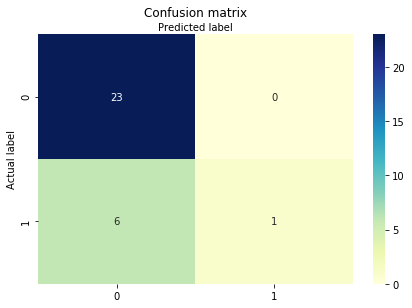

In [59]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### Calculate Recall, Precision and Accuracy along with ROC score and its curve

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.8
Precision: 1.0
Recall: 0.14285714285714285


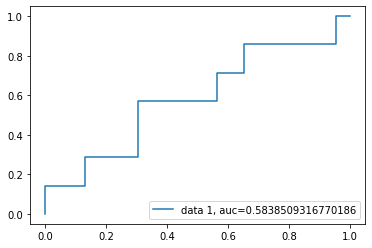

In [63]:
y_pred_proba = logreg_model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()